In [28]:
# imports
import pandas as pd
import numpy as np
import datetime
import seaborn

In [29]:
# importing dataset
sneakers_df = pd.read_csv("sneakers_data.csv")

# taking a glimpse into the data
sneakers_df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Here, we can see that the first 5 rows of the dataset contains order_amount (total cost of purchase) values that have a range of between 90 and 230. Looking at the naively calculated AOV, it is quite strange relative to the range we are looking at. Let's investigate this further by taking a look at what the order_amount and total_items column is like by generating summary statistics. 

In [30]:
# generating summary statistics for order_amount and total_items column
sneakers_df[["order_amount", "total_items"]].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


## 1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

There are a few alarming things here when we take a look at the column's statistics. 

1. The mean for order_amount is approximately 3145.13, which is the naively calculated AOV. 
2. The maximum value of the order_amount is 704000 while the minimum value is 90. Moreover, the maximum value of the total_items is 2000 while the minimum value is 1. 

Examining these values in relation to the order_amount and total_items values at the different quantiles and looking at the large standard deviation value, we can suspect that there might be outliers in the dataset. 

To check for the presence of outliers, let's graph a boxplot and histogram. Let's scale the y-axis on the boxplot and x-axis on the histogram (the order_amount values) by applying a log-transformation so that we can better visualize and analyze them. 

<AxesSubplot:xlabel='order_amount'>

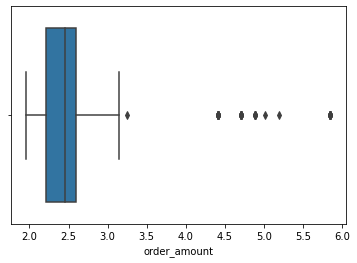

In [31]:
# generating boxplot of order_amount
seaborn.boxplot(x = np.log10(sneakers_df["order_amount"]))

<AxesSubplot:xlabel='order_amount', ylabel='Count'>

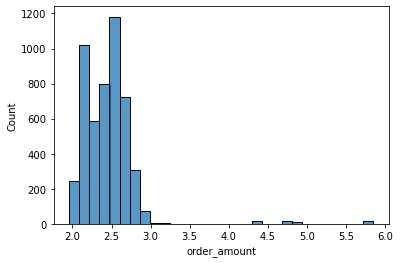

In [32]:
# generating histogram of order_amount
seaborn.histplot(np.log10(sneakers_df['order_amount']), bins = 30)

Here, we can see that there is the **presence of outliers within the data**. Moreover, from the histogram, we can see that the distribution of the **order_amount values is right-skewed**. This further supports the fact that the naively calculated AOV doesn't truly represent the performance of sales in March and that the more representative metric is much lower than the naively calculated AOV.

## 2. What metric would you report for this dataset?

Because of that, a better evaluation metric would be a **metric that is more robust to outliers**. I propose using the **median value of order_amount** as a better way of evaluating this data. It is a statistic that will better represent the performance given its **robustness to outliers and skew of the distribution**. 

## 3. What is its value?

Its value is **$284**. 

In [33]:
# printing the new metric value
print("median = %s" %sneakers_df["order_amount"].median())

median = 284.0
